In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
df = pd.read_csv('archive (4)/jamboree_dataset.csv')

In [42]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


# Understand your data with descriptive statistics

In [4]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [5]:
df.shape

(500, 9)

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
df.groupby('University Rating').size()

University Rating
1     34
2    126
3    162
4    105
5     73
dtype: int64

In [9]:
df.groupby('Research').size()

Research
0    220
1    280
dtype: int64

In [10]:
df.groupby('SOP').size()

SOP
1.0     6
1.5    25
2.0    43
2.5    64
3.0    80
3.5    88
4.0    89
4.5    63
5.0    42
dtype: int64

In [11]:
df.groupby('LOR ').size()

LOR 
1.0     1
1.5    11
2.0    46
2.5    50
3.0    99
3.5    86
4.0    94
4.5    63
5.0    50
dtype: int64

In [12]:
from pandas import set_option
set_option('display.width',100)
correlations = df.drop('Serial No.',axis=1).corr(method='pearson')
print(correlations)

                   GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
GRE Score           1.000000     0.827200           0.635376  0.613498  0.524679  0.825878   
TOEFL Score         0.827200     1.000000           0.649799  0.644410  0.541563  0.810574   
University Rating   0.635376     0.649799           1.000000  0.728024  0.608651  0.705254   
SOP                 0.613498     0.644410           0.728024  1.000000  0.663707  0.712154   
LOR                 0.524679     0.541563           0.608651  0.663707  1.000000  0.637469   
CGPA                0.825878     0.810574           0.705254  0.712154  0.637469  1.000000   
Research            0.563398     0.467012           0.427047  0.408116  0.372526  0.501311   
Chance of Admit     0.810351     0.792228           0.690132  0.684137  0.645365  0.882413   

                   Research  Chance of Admit   
GRE Score          0.563398          0.810351  
TOEFL Score        0.467012          0.792228  
Universit

In [13]:
# mathematically see the skewness of the data
df.skew()

Serial No.           0.000000
GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

# Understand your data with visualisation

### understanding the distribution using box and wisker plot, histogram, density pot

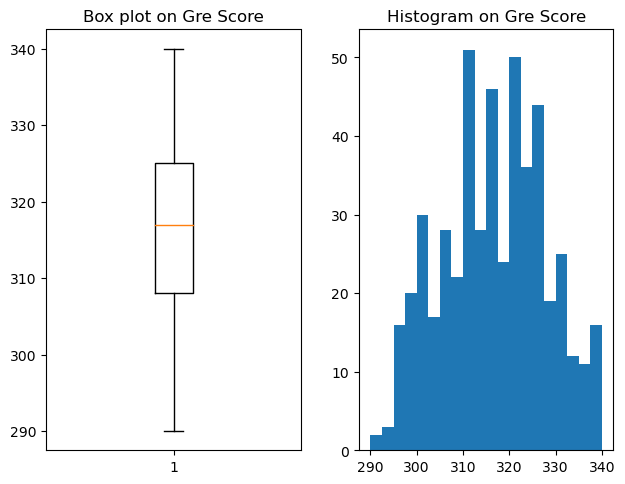

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
fig.tight_layout()
axes[0].boxplot(df['GRE Score'])
axes[0].set_title('Box plot on Gre Score')
axes[1].hist(df['GRE Score'],bins=20)
axes[1].set_title('Histogram on Gre Score')
plt.show()

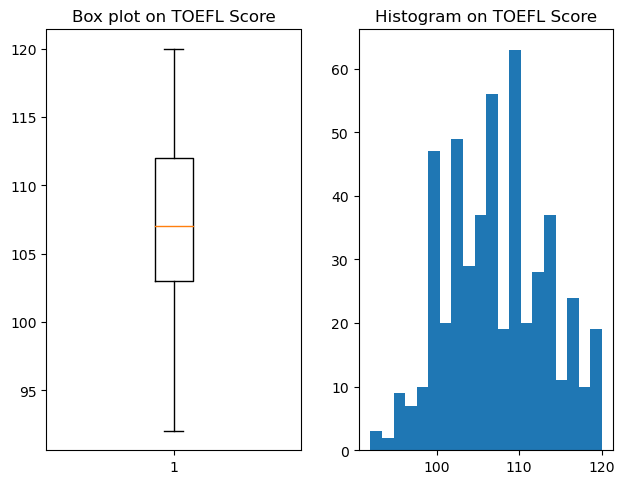

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
fig.tight_layout()
axes[0].boxplot(df['TOEFL Score'])
axes[0].set_title('Box plot on TOEFL Score')
axes[1].hist(df['TOEFL Score'],bins=20)
axes[1].set_title('Histogram on TOEFL Score')
plt.show()

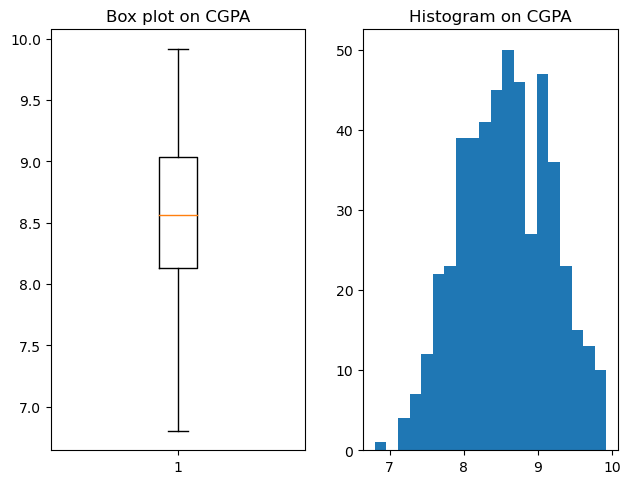

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
fig.tight_layout()
axes[0].boxplot(df['CGPA'])
axes[0].set_title('Box plot on CGPA')
axes[1].hist(df['CGPA'],bins=20)
axes[1].set_title('Histogram on CGPA')
plt.show()

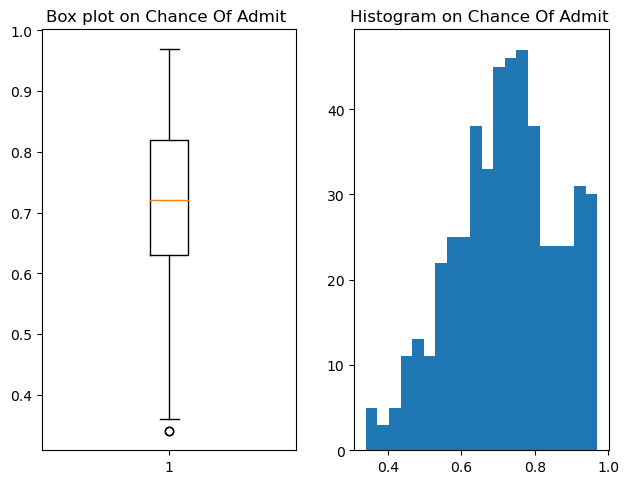

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
fig.tight_layout()
axes[0].boxplot(df['Chance of Admit '])
axes[0].set_title('Box plot on Chance Of Admit ')
axes[1].hist(df['Chance of Admit '],bins=20)
axes[1].set_title('Histogram on Chance Of Admit ')
plt.show()

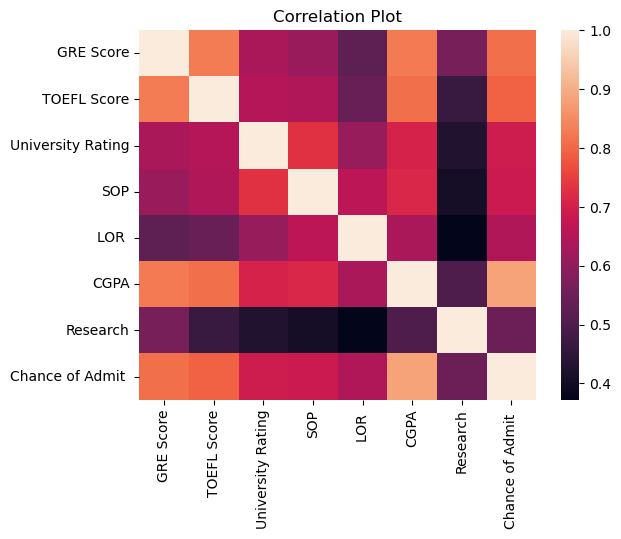

In [18]:
sns.heatmap(correlations)
plt.title('Correlation Plot')
plt.show()

In [19]:
# computing the data with all the continuous variable
# df.drop('Serial No.',axis=1,inplace = True)
c_var = []
for i in df.columns:
    print(f'{i} has {len(df.groupby(i).size())}')
    if len(df.groupby(i).size()) > 10:
        c_var.append(i)
print(c_var)

Serial No. has 500
GRE Score has 49
TOEFL Score has 29
University Rating has 5
SOP has 9
LOR  has 9
CGPA has 184
Research has 2
Chance of Admit  has 61
['Serial No.', 'GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']


In [20]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [21]:
c_var_df = df[c_var]
c_var_df.head(10)

,Serial No.,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,1,337,118,9.65,0.92
1,2,324,107,8.87,0.76
2,3,316,104,8.00,0.72
3,4,322,110,8.67,0.80
4,5,314,103,8.21,0.65
5,6,330,115,9.34,0.90
6,7,321,109,8.20,0.75
7,8,308,101,7.90,0.68
8,9,302,102,8.00,0.50
9,10,323,108,8.60,0.45


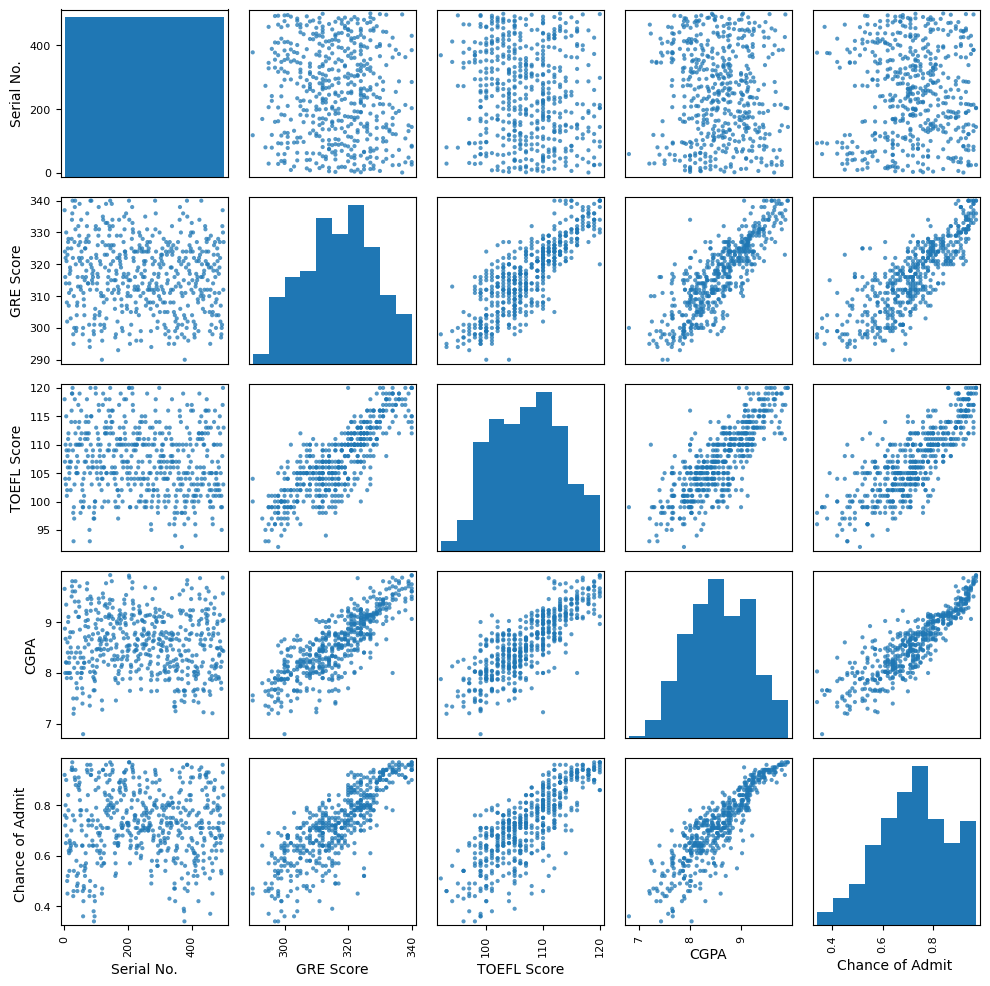

In [22]:
scatter_matrix = pd.plotting.scatter_matrix(c_var_df, alpha=0.75, figsize=(10, 10))
plt.tight_layout()
plt.show()

# data cleaning

In [23]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
c_var

['Serial No.', 'GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

# scaling the data
# we are not using min max scaling because the later is affec'ted by outlier
# it preserves the distribution, the data are in the same scale

In [27]:
c_var

['Serial No.', 'GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

In [28]:
cat_var = [i for i in df.columns if i not in c_var]

In [29]:
car_var_df = df[cat_var]
car_var_df.head()

,University Rating,SOP,LOR,Research
0,4,4.5,4.5,1
1,4,4.0,4.5,1
2,3,3.0,3.5,1
3,3,3.5,2.5,1
4,2,2.0,3.0,0


In [30]:
# Splitting the data into train test split
# we do not need to scale the target variable 
# because scaling is for the features so we do not need to scale the features in knn or any other supervised learning algorithm
x = df.drop('Chance of Admit ',axis=1)
y = df['Chance of Admit ']

In [31]:
df.columns = [i for i in range(len(df.columns))]

In [32]:
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [33]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2,random_state=1)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.fit_transform(xtest)

In [36]:
# apply knn regression and evaluate performance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
k_values = range(1,10)
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(scaled_xtrain, ytrain)
    y_pred = knn.predict(scaled_xtest)
    mse = mean_squared_error(ytest, y_pred)
    mse_scores.append(mse)

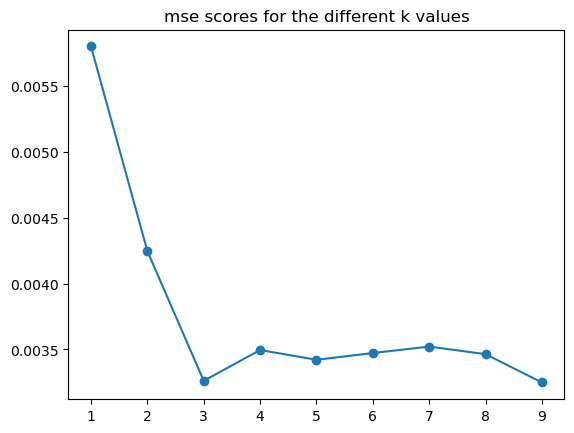

In [37]:
# plotting the mse scores for the different k values
plt.plot(k_values, mse_scores, marker='o')
plt.title('mse scores for the different k values')
plt.show()

In [38]:
# why do we take k smaller than larger?
# so we took a k with 3

In [39]:
# Now using K-Fold Cross validation on the data

In [43]:
# using cross validation to find the accuracy of the data

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [44]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [48]:
import seaborn as sns

In [50]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [52]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [56]:
num_folds = 10
kfolds = KFold(n_splits = num_folds, random_state = 2, shuffle=True)

In [61]:
model = KNeighborsRegressor(n_neighbors=3)
results = cross_val_score(model,x,y,cv = kfolds,scoring = 'r2')

In [62]:
results

array([0.78031752, 0.76322844, 0.63816414, 0.73893122, 0.78738549,
       0.6189779 , 0.67474394, 0.85483968, 0.61349845, 0.70428108])

In [63]:
np.mean(results)

0.7174367848122876

In [64]:
np.std(results)

0.07685211997025791

## Spot checking different algorithms 

### 1. Linear regression

In [ ]:
#checking for the assumption before running linear regression

In [70]:
from sklearn.linear_model import LinearRegression
def run_reg(x,y):
    kfold = KFold(n_splits = 10, shuffle=True, random_state = 15)
    model = LinearRegression()
    results = cross_val_score(model,x,y,cv=kfold,scoring = 'r2')
    print(np.mean(results))

In [88]:
run_reg(x,y)

0.8190809836601668


### 2. Ridge Regression

In [74]:
from sklearn.linear_model import Ridge
def run_ridge(x,y):
    kfold = KFold(n_splits=10, shuffle = True, random_state = 10)
    model = Ridge()
    results = cross_val_score(model, x, y, scoring='r2')
    print(np.mean(results))

In [75]:
run_ridge(x,y)

0.7174367848122876


### 3. Lasso Regression

In [83]:
from sklearn.linear_model import Lasso
def run_lasso(x,y):
    kfold = KFold(n_splits = 10, shuffle=True, random_state=5)
    model = Lasso()
    results = cross_val_score(model, x, y, scoring = 'r2')
    print(np.mean(results))

In [84]:
run_lasso(x,y)

0.1981186895962629


## Non Linear Regression

### 4. Regression Tree

In [85]:
from sklearn.tree import DecisionTreeRegressor
def run_tree(x,y):
    kfold = KFold(n_splits = 10, shuffle=True, random_state=10)
    model = DecisionTreeRegressor()
    results = cross_val_score(model,x,y,scoring='r2')
    return np.mean(results)

In [86]:
print(run_tree(x,y))
#since the data is linear we will geta low rsquared value

0.6762299436064458


In [90]:
lr = LinearRegression()
model = lr.fit(x,y)